In [1]:
from web3 import Web3
import json
import requests
import csv
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
from time import *
import plotly.express as px
import plotly.io as pio
pd.options.plotting.backend = "plotly"
pio.renderers.default = "plotly_mimetype+notebook_connected"
import plotly.graph_objects as go
import math
import warnings
import scipy.stats
import random

In [2]:
df_pre = pd.read_csv('df_pre.csv')
df_post = pd.read_csv('df_post.csv')

In [20]:
df_pre

,Unnamed: 0,blk no.,variance,variance_str,bucket,n_bxs
0,0,12935000,209.313061,0 209.313061\n1 1968.608502\n2 ...,12935,1
1,1,12935001,1968.608502,0 209.313061\n1 1968.608502\n2 ...,12935,1
2,2,12935002,44.704849,0 209.313061\n1 1968.608502\n2 ...,12935,1
3,3,12935003,78.156181,0 209.313061\n1 1968.608502\n2 ...,12935,1
4,4,12935004,18.925666,0 209.313061\n1 1968.608502\n2 ...,12935,1
...,...,...,...,...,...,...
29607,29607,12964995,128.522033,0 209.313061\n1 1968.608502\n2 ...,12964,1
29608,29608,12964996,84.649866,0 209.313061\n1 1968.608502\n2 ...,12964,1
29609,29609,12964997,2684.549970,0 209.313061\n1 1968.608502\n2 ...,12964,1
29610,29610,12964998,34.344419,0 209.313061\n1 1968.608502\n2 ...,12964,1


In [34]:
inp = df_pre['variance']
Q1 = inp.quantile(0.25)
Q3 = inp.quantile(0.75)
IQR = Q3 - Q1

new_df_pre = df_pre[(df_pre['variance'] < (Q1 - 1.5 * IQR)) |(df_pre['variance'] > (Q3 + 1.5 * IQR))]
array = np.histogram_bin_edges(new_df_pre['variance'], bins = 'fd')
array

array([1.66468587e+03, 3.82712965e+03, 5.98957342e+03, ...,
       5.34097010e+07, 5.34118634e+07, 5.34140258e+07])

In [57]:
df_pre['variance_category'] = pd.cut(df_pre['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)

In [58]:
df_pre['variance_category']

0            (0, 500]
1        (1500, 2000]
2            (0, 500]
3            (0, 500]
4            (0, 500]
             ...     
29607        (0, 500]
29608        (0, 500]
29609    (2500, 3000]
29610        (0, 500]
29611        (0, 500]
Name: variance_category, Length: 29612, dtype: object

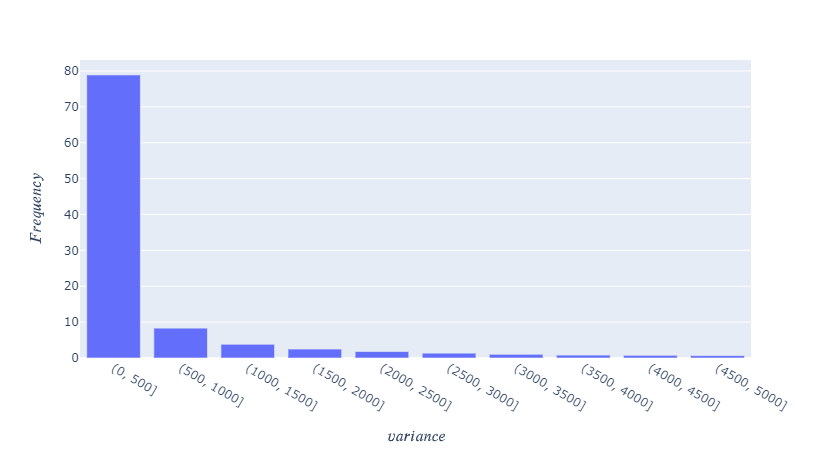

In [59]:
block_freq = df_pre[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)

In [60]:
df_post['variance_category'] = pd.cut(df_pre['variance'] , bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]).astype(str)

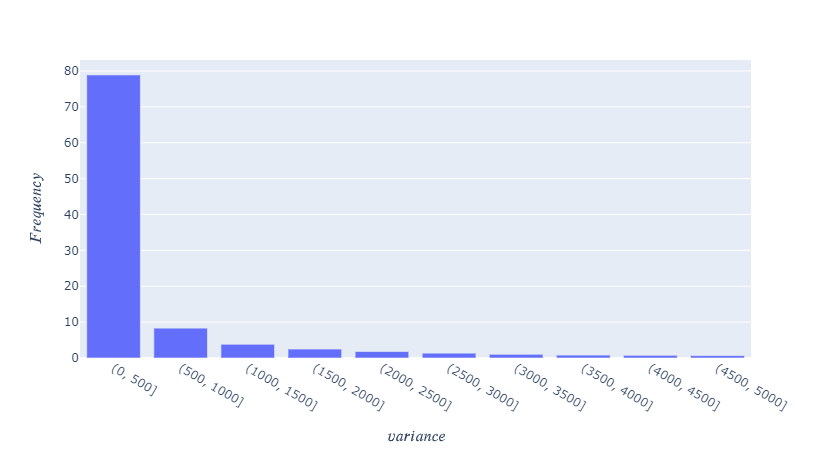

In [61]:
block_freq = df_post[['variance_category']].value_counts(normalize=True).rename_axis('variance_category').reset_index(name='freq')
block_freq["freq"] *= 100
px.bar(
    block_freq, x="variance_category", y="freq", labels={"blk no.": " $#blocks after l$ ", "variance_category": " $variance$ ", "freq": "$Frequency$"},

)